In [9]:
import warnings
warnings.filterwarnings("ignore")

In [321]:
# Importing important modules
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error 
from math import sqrt 
import statsmodels.api as sm

In [322]:
# Reading the airline-passengers dataset
series = pd.read_csv('datasets/airline-passengers.csv')
series

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


### Dividing into train and test dataset

In [323]:
train = series.iloc[0:132]
test = series.iloc[132:]        # last 12 months in test data

In [312]:
train

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
127,1959-08,559
128,1959-09,463
129,1959-10,407
130,1959-11,362


In [313]:
test

,Month,Passengers
132,1960-01,417
133,1960-02,391
134,1960-03,419
135,1960-04,461
136,1960-05,472
137,1960-06,535
138,1960-07,622
139,1960-08,606
140,1960-09,508
141,1960-10,461


## Heuristic Methods

## 1. Naive Forecast

In [252]:
y_hat = test.copy()

In [253]:
train[-1:]       # gives last value of training dataset

,Month,Passengers
131,1959-12,405


In [254]:
# In Naive forecast, we take the last value for the further predictions
y_hat["NF"] = train["Passengers"].iloc[-1]
y_hat

,Month,Passengers,NF
132,1960-01,417,405
133,1960-02,391,405
134,1960-03,419,405
135,1960-04,461,405
136,1960-05,472,405
137,1960-06,535,405
138,1960-07,622,405
139,1960-08,606,405
140,1960-09,508,405
141,1960-10,461,405


In [255]:
rms = sqrt(mean_squared_error(test.Passengers, y_hat.NF)) 
rms

102.97653454387881

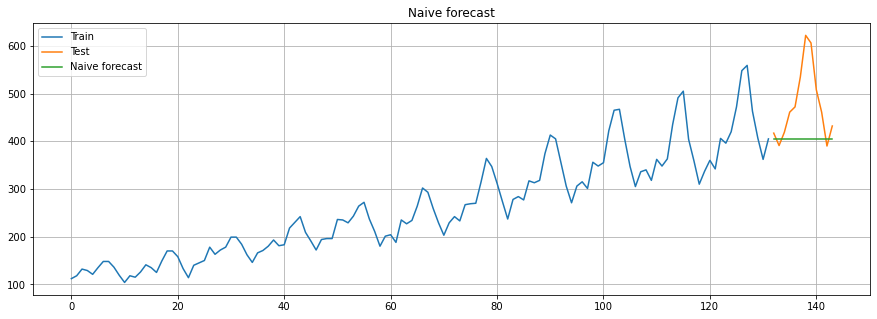

In [256]:
plt.figure(figsize=(15,5))
plt.grid()
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat['NF'], label='Naive forecast')
plt.legend(loc='best')
plt.title('Naive forecast')
plt.show()

## 2. Average Method

In [257]:
y_hat = test.copy()

In [258]:
# taking average value of passengers of training data
train["Passengers"].mean()

262.49242424242425

In [259]:
y_hat["Average"] = train["Passengers"].mean()
y_hat

,Month,Passengers,Average
132,1960-01,417,262.492424
133,1960-02,391,262.492424
134,1960-03,419,262.492424
135,1960-04,461,262.492424
136,1960-05,472,262.492424
137,1960-06,535,262.492424
138,1960-07,622,262.492424
139,1960-08,606,262.492424
140,1960-09,508,262.492424
141,1960-10,461,262.492424


In [260]:
rms = sqrt(mean_squared_error(test.Passengers, y_hat.Average)) 
rms

226.26567149657532

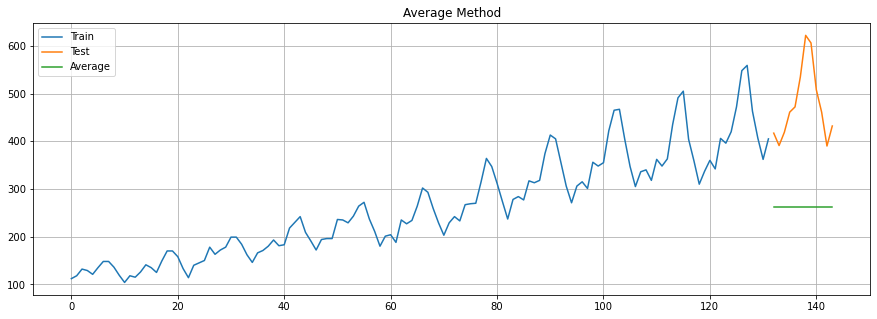

In [261]:
plt.figure(figsize=(15,5))
plt.grid()
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat['Average'], label='Average')
plt.legend(loc='best')
plt.title('Average Method')
plt.show()

## 3. Simple Moving Average

### 12 Months moving average

In [262]:
y_hat = test.copy()

In [263]:
# rolling function is used to do operations on a sliding window
rolling = series.rolling(window=12)
rolling_mean = rolling.mean()
y_hat["Moving_avg_12"] = rolling_mean[-12:]

In [264]:
y_hat

,Month,Passengers,Moving_avg_12
132,1960-01,417,433.083333
133,1960-02,391,437.166667
134,1960-03,419,438.250000
135,1960-04,461,443.666667
136,1960-05,472,448.000000
137,1960-06,535,453.250000
138,1960-07,622,459.416667
139,1960-08,606,463.333333
140,1960-09,508,467.083333
141,1960-10,461,471.583333


In [265]:
rms = sqrt(mean_squared_error(test.Passengers, y_hat.Moving_avg_12)) 
rms

75.21419644736108

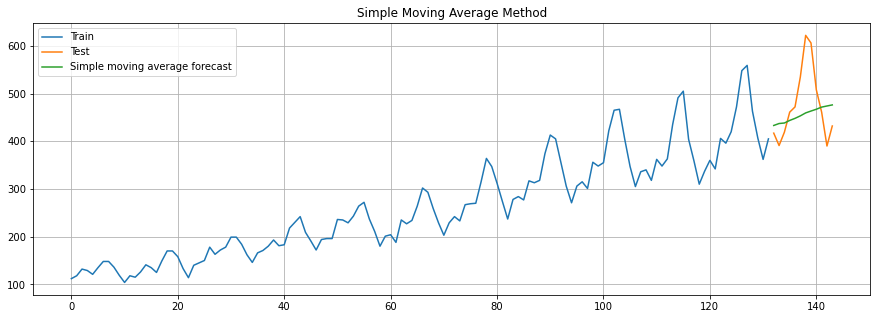

In [250]:
plt.figure(figsize=(15,5))
plt.grid()
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat['Moving_avg_12'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

## 4. Seasonal Naive Forecast

In [266]:
# Assuming the season is of 12 months
y_hat = test.copy()

In [267]:
lst = []
for i in range(12,0,-1):
    lst.append(train["Passengers"].iloc[-i])
    
lst

[360, 342, 406, 396, 420, 472, 548, 559, 463, 407, 362, 405]

In [268]:
SNF = np.array(lst)
SNF

array([360, 342, 406, 396, 420, 472, 548, 559, 463, 407, 362, 405],
      dtype=int64)

In [269]:
y_hat["SNF"] = SNF

In [270]:
y_hat

,Month,Passengers,SNF
132,1960-01,417,360
133,1960-02,391,342
134,1960-03,419,406
135,1960-04,461,396
136,1960-05,472,420
137,1960-06,535,472
138,1960-07,622,548
139,1960-08,606,559
140,1960-09,508,463
141,1960-10,461,407


In [271]:
rms = sqrt(mean_squared_error(test.Passengers, y_hat.SNF)) 
rms

50.708316214732804

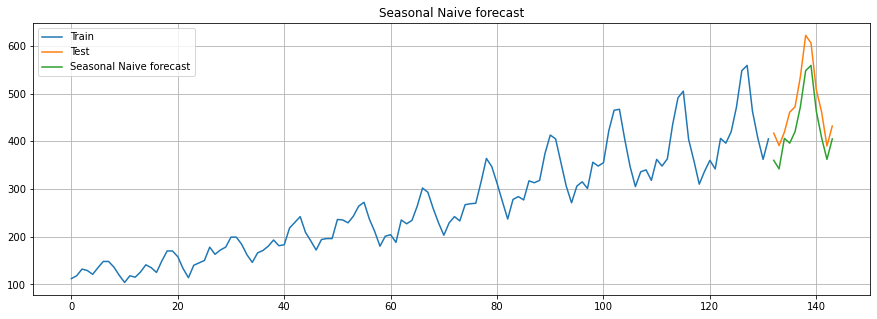

In [272]:
plt.figure(figsize=(15,5))
plt.grid()
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat['SNF'], label='Seasonal Naive forecast')
plt.legend(loc='best')
plt.title('Seasonal Naive forecast')
plt.show()

## 5. Drift Method

In [316]:
y_hat = test.copy()

In [314]:
slope = (train["Passengers"].iloc[-1]-train["Passengers"].iloc[0])/(len(train)-1)
slope

2.236641221374046

In [315]:
lst1 = []
for i in range(1,13):
    lst1.append(train["Passengers"].iloc[-1] + i*slope)
    
lst1

[407.23664122137404,
 409.4732824427481,
 411.70992366412213,
 413.9465648854962,
 416.1832061068702,
 418.41984732824426,
 420.6564885496183,
 422.89312977099235,
 425.1297709923664,
 427.36641221374043,
 429.6030534351145,
 431.8396946564886]

In [317]:
drift = np.array(lst1)
drift

array([407.23664122, 409.47328244, 411.70992366, 413.94656489,
       416.18320611, 418.41984733, 420.65648855, 422.89312977,
       425.12977099, 427.36641221, 429.60305344, 431.83969466])

In [318]:
y_hat["drift"] = drift
y_hat

,Month,Passengers,drift
132,1960-01,417,407.236641
133,1960-02,391,409.473282
134,1960-03,419,411.709924
135,1960-04,461,413.946565
136,1960-05,472,416.183206
137,1960-06,535,418.419847
138,1960-07,622,420.656489
139,1960-08,606,422.893130
140,1960-09,508,425.129771
141,1960-10,461,427.366412


In [319]:
rms = sqrt(mean_squared_error(test.Passengers, y_hat.drift)) 
rms

92.66636342994126

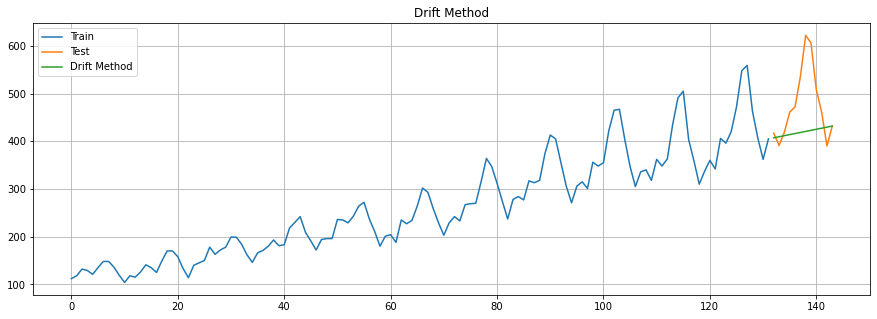

In [320]:
plt.figure(figsize=(15,5))
plt.grid()
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat['drift'], label='Drift Method')
plt.legend(loc='best')
plt.title('Drift Method')
plt.show()

## Exponential Methods

## Simple Exponential Smoothing

In [281]:
y_hat = test.copy()

In [282]:
fitx = SimpleExpSmoothing(np.asarray(train['Passengers'])).fit(optimized=True)
print('optimal alpha chosen:', fitx.model.params['smoothing_level'])

optimal alpha chosen: 0.995


In [283]:
# print the rmse of training step
rms_train_opt = sqrt(mean_squared_error(train['Passengers'], fitx.fittedvalues)) 
print('rmse for fitted values with optimal alpha: ', rms_train_opt)

rmse for fitted values with optimal alpha:  31.25861901439978


In [285]:
# Fitting the model on test data
y_hat['SES_opt_fcast'] = fitx.forecast(len(y_hat))
y_hat

,Month,Passengers,SES_opt_fcast
132,1960-01,417,404.786132
133,1960-02,391,404.786132
134,1960-03,419,404.786132
135,1960-04,461,404.786132
136,1960-05,472,404.786132
137,1960-06,535,404.786132
138,1960-07,622,404.786132
139,1960-08,606,404.786132
140,1960-09,508,404.786132
141,1960-10,461,404.786132


In [200]:
# calculate RMSE of the forecast on test data
rms_opt = sqrt(mean_squared_error(test.Passengers, y_hat.SES_opt_fcast)) 
print('rmse for model with optimal alpha: ', rms_opt)

rmse for model with optimal alpha:  103.12445366139319


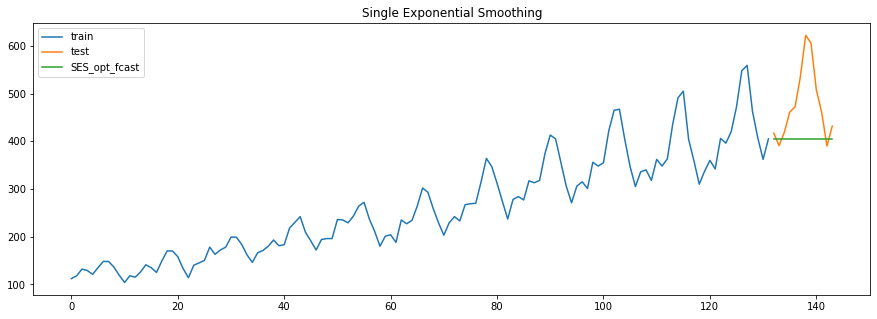

In [287]:
# plot the time series as train, test and forecasted
plt.figure(figsize=(15,5))
plt.plot(train['Passengers'], label='train')
plt.plot(test['Passengers'], label='test')

plt.plot(y_hat['SES_opt_fcast'], label='SES_opt_fcast')
plt.legend(loc='best')
plt.title('Single Exponential Smoothing')
plt.show()

## Double Exponential Smoothing

In [326]:
y_hat = test.copy()

In [290]:
# using the ExponentialSmoothing library

model = ExponentialSmoothing(np.asarray(train['Passengers']), trend='add', seasonal=None)
fit1 = model.fit(optimized=True)
y_hat['DES'] = fit1.forecast(len(test))
y_hat

,Month,Passengers,DES
132,1960-01,417,407.200279
133,1960-02,391,409.600366
134,1960-03,419,412.000453
135,1960-04,461,414.400539
136,1960-05,472,416.800626
137,1960-06,535,419.200713
138,1960-07,622,421.600799
139,1960-08,606,424.000886
140,1960-09,508,426.400973
141,1960-10,461,428.801059


In [291]:
rmse=sqrt(mean_squared_error(test.Passengers, y_hat['DES']))
print(rmse)

92.10399279260226


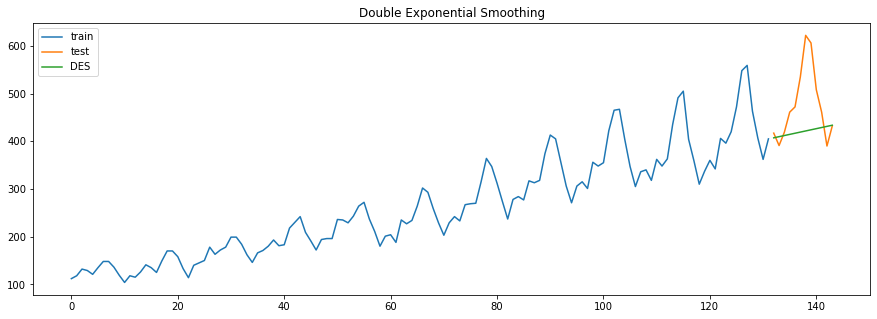

In [293]:
plt.figure(figsize=(15,5))
plt.plot(train['Passengers'], label='train')
plt.plot(test['Passengers'], label='test')

plt.plot(y_hat['DES'], label='DES')
plt.legend(loc='best')
plt.title("Double Exponential Smoothing")
plt.show()

## Triple Exponential Smoothing

In [294]:
y_hat = test.copy()

In [327]:
model = ExponentialSmoothing(np.asarray(train['Passengers']), seasonal_periods=6, trend='add', seasonal='mul')
fit1 = model.fit(optimized=True)
y_hat['TES_add_mul'] = fit1.forecast(len(test))
y_hat

,Month,Passengers,TES_add_mul
132,1960-01,417,442.526810
133,1960-02,391,439.730055
134,1960-03,419,417.542869
135,1960-04,461,384.842283
136,1960-05,472,366.602766
137,1960-06,535,418.256945
138,1960-07,622,456.927045
139,1960-08,606,453.962094
140,1960-09,508,430.984304
141,1960-10,461,397.164915


In [328]:
rmse=sqrt(mean_squared_error(test.Passengers, y_hat['TES_add_mul']))
print(rmse)

88.54115734161051


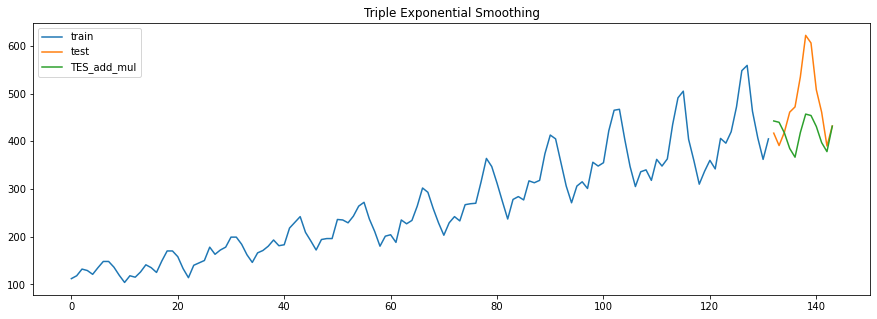

In [311]:
plt.figure(figsize=(15,5))
plt.plot(train['Passengers'], label='train')
plt.plot(test['Passengers'], label='test')
plt.plot(y_hat['TES_add_mul'], label='TES_add_mul')
plt.legend(loc='best')
plt.title("Triple Exponential Smoothing")
plt.show()